# Weapons & Circumstances cosine similarity for Female Victims

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

import pickle as pk

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [2]:
map_data = pd.read_csv('../data/SHR65_22.csv', index_col=0)
map_data.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,1,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Rural Alaska
197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,"Mobile, AL"


In [3]:
outliers = [
    {
        'name': 'Strangulation - hanging',
        'Texas': [1976, 1981],
        'Maryland': [1992, 1998],
        'California': [[1976, 1987], [2013, 2020]],
        'Oregon': [1997, 2003]
    },
    {
        'name': 'Fire',
        'Pennsylvania': [1976, 1990],
        'New York': [[1976, 1989], [1992, 1996]],
        'New Jersey': [1979, 1990],
        'California': [1989, 1998]
    },
    {
        'name': 'Other gun',
        'North Carolina': [1998, 2018]
    }
]

In [4]:
map_data['Weapon'].unique()

array(['Knife or cutting instrument', 'Shotgun',
       'Strangulation - hanging', 'Rifle',
       'Handgun - pistol, revolver, etc',
       'Personal weapons, includes beating', 'Fire',
       'Other or type unknown', 'Firearm, type not stated',
       'Asphyxiation - includes death by gas',
       'Narcotics or drugs, sleeping pills',
       'Blunt object - hammer, club, etc', 'Drowning',
       'Pushed or thrown out window', 'Other gun',
       'Poison - does not include gas', 'Explosives',
       'Weapon Not Reported'], dtype=object)

In [4]:
df = map_data[(map_data['Weapon']=='Strangulation - hanging')
              & (map_data['State']=='Texas')
              & (map_data['VicSex']=='Female')
              & (map_data['Year'].between(1976, 1981))]
df.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197602001TX03400,"Cass, TX",TX03400,Texas,Cass County,Sheriff,FBI,Yes,1976,February,1,...,Black,Unknown or not reported,Strangulation - hanging,Other - known to victim,Other,NaN,0,0,30180.0,Rural Texas
197602001TX03401,"Cass, TX",TX03401,Texas,Atlanta,Municipal police,FBI,Yes,1976,February,1,...,Black,Unknown or not reported,Strangulation - hanging,Acquaintance,Other,NaN,0,0,30180.0,Rural Texas
197603015TXDPD00,"Dallas, TX",TXDPD00,Texas,Dallas,Municipal police,FBI,No,1976,March,15,...,Unknown,Unknown or not reported,Strangulation - hanging,Relationship not determined,Other,NaN,0,0,30180.0,"Dallas-Fort Worth-Arlington, TX"
197604019TXHPD00,"Harris, TX",TXHPD00,Texas,Houston,Municipal police,FBI,Yes,1976,April,19,...,White,Unknown or not reported,Strangulation - hanging,Daughter,Other,NaN,0,0,30180.0,"Houston-Sugar Land-Baytown, TX"
197606001TX23501,"Victoria, TX",TX23501,Texas,Victoria,Municipal police,FBI,No,1976,June,1,...,Unknown,Unknown or not reported,Strangulation - hanging,Relationship not determined,Other,NaN,0,0,30180.0,"Victoria, TX"


In [5]:
df.shape

(90, 29)

In [6]:
norm = map_data[(map_data['Weapon']=='Strangulation - hanging')
                & (map_data['State']=='Texas')
                & (map_data['VicSex']=='Female')
                & (~map_data['Year'].between(1976, 1981))]

norm.groupby('Solved').mean()

,Year,Incident,VicAge,OffAge,VicCount,OffCount,FileDate
Solved,,,,,,,
No,1994.385593,6.822034,93.716102,999.000000,0.042373,0.000000,59665.152542
Yes,1998.705882,5.128028,50.013841,68.432526,0.100346,0.190311,62066.269896


In [7]:
df.groupby('Solved').mean()

,Year,Incident,VicAge,OffAge,VicCount,OffCount,FileDate
Solved,,,,,,,
No,1979.156863,11.470588,87.137255,999.000000,0.039216,0.000000,36233.529412
Yes,1978.794872,5.641026,40.846154,101.487179,0.051282,0.076923,32506.230769


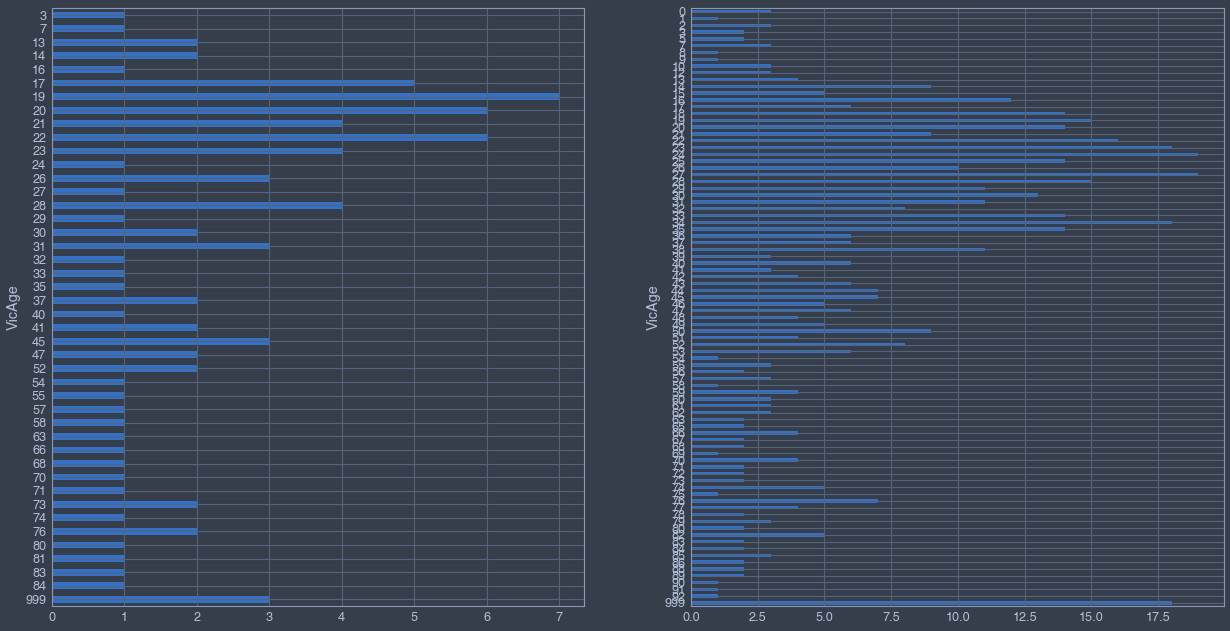

In [18]:
figure, ax = plt.subplots(1, 2, figsize=(21, 11))
df.groupby('VicAge').count()['Ori'].plot(kind='barh', ax=ax[0]).invert_yaxis()
norm.groupby('VicAge').count()['Ori'].plot(kind='barh', ax=ax[1]).invert_yaxis()

In [20]:
norm.groupby('VicRace').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
VicRace,,,,,,,,,,,,,,,,,,,,,
American Indian or Alaskan Native,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Asian,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,0,4,4,4,4
Black,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,0,123,123,123,123
Unknown,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,0,4,4,4,4
White,393,393,393,393,393,393,393,393,393,393,...,393,393,393,393,393,0,393,393,393,393


In [24]:
norm[norm['Solved']=='No'].groupby('VicRace').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
VicRace,,,,,,,,,,,,,,,,,,,,,
American Indian or Alaskan Native,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Asian,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,0,3,3,3,3
Black,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,0,61,61,61,61
Unknown,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,0,2,2,2,2
White,169,169,169,169,169,169,169,169,169,169,...,169,169,169,169,169,0,169,169,169,169


In [22]:
df.groupby('VicRace').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
VicRace,,,,,,,,,,,,,,,,,,,,,
Black,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,0,24,24,24,24
White,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,0,66,66,66,66


In [25]:
df[df['Solved']=='No'].groupby('VicRace').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
VicRace,,,,,,,,,,,,,,,,,,,,,
Black,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,0,17,17,17,17
White,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,0,34,34,34,34


In [8]:
df.groupby(['CNTYFIPS', 'Year']).count()

Ori  State  Agency  Agentype  Source  Solved  Month  \
CNTYFIPS       Year                                                        
Angelina, TX   1980    1      1       1         1       1       1      1   
Bell, TX       1980    1      1       1         1       1       1      1   
Bexar, TX      1977    1      1       1         1       1       1      1   
               1980    3      3       3         3       3       3      3   
               1981    3      3       3         3       3       3      3   
Cameron, TX    1978    2      2       2         2       2       2      2   
Cass, TX       1976    2      2       2         2       2       2      2   
Collin, TX     1981    1      1       1         1       1       1      1   
Dallas, TX     1976    4      4       4         4       4       4      4   
               1977    1      1       1         1       1       1      1   
               1978    5      5       5         5       5       5      5   
               1979    4      4       4         4       4       4      4   
               1980    3      3       3         3       3       3      3   
               1981    2      2       2         2       2       2      2   
Denton, TX     1978    1      1       1         1       1       1      1   
Ector, TX      1981    1      1       1         1       1       1      1   
El Paso, TX    1977    3      3       3         3       3       3      3   
               1979    1      1       1         1       1       1      1   
               1980    1      1       1         1       1       1      1   
Fort Bend, TX  1977    1      1       1         1       1       1      1   
Gonzales, TX   1980    1      1       1         1       1       1      1   
Gregg, TX      1980    1      1       1         1       1       1      1   
               1981    1      1       1         1       1       1      1   
Harris, TX     1976    2      2       2         2       2       2      2   
               1977    1      1       1         1       1       1      1   
               1978    3      3       3         3       3       3      3   
               1979    5      5       5         5       5       5      5   
               1980    7      7       7         7       7       7      7   
               1981    8      8       8         8       8       8      8   
Jefferson, TX  1977    1      1       1         1       1       1      1   
Montgomery, TX 1980    1      1       1         1       1       1      1   
Robertson, TX  1981    1      1       1         1       1       1      1   
Sabine, TX     1977    1      1       1         1       1       1      1   
Smith, TX      1979    1      1       1         1       1       1      1   
Tarrant, TX    1980    4      4       4         4       4       4      4   
               1981    1      1       1         1       1       1      1   
Taylor, TX     1977    1      1       1         1       1       1      1   
Terry, TX      1981    1      1       1         1       1       1      1   
Travis, TX     1976    1      1       1         1       1       1      1   
               1978    3      3       3         3       3       3      3   
               1979    1      1       1         1       1       1      1   
               1980    1      1       1         1       1       1      1   
               1981    1      1       1         1       1       1      1   
Victoria, TX   1976    1      1       1         1       1       1      1   

                     Incident  ActionType  Homicide  ...  OffRace  OffEthnic  \
CNTYFIPS       Year                                  ...                       
Angelina, TX   1980         1           1         1  ...        1          1   
Bell, TX       1980         1           1         1  ...        1          1   
Bexar, TX      1977         1           1         1  ...        1          1   
               1980         3           3         3  ...        3          3   
               1981         3           3   

In [17]:
df[df['Solved']=='No'].groupby(['CNTYFIPS', 'Year']).count()

Ori  State  Agency  Agentype  Source  Solved  Month  \
CNTYFIPS      Year                                                        
Angelina, TX  1980    1      1       1         1       1       1      1   
Bexar, TX     1981    1      1       1         1       1       1      1   
Cameron, TX   1978    1      1       1         1       1       1      1   
Collin, TX    1981    1      1       1         1       1       1      1   
Dallas, TX    1976    2      2       2         2       2       2      2   
              1977    1      1       1         1       1       1      1   
              1978    1      1       1         1       1       1      1   
              1979    3      3       3         3       3       3      3   
              1980    2      2       2         2       2       2      2   
              1981    2      2       2         2       2       2      2   
Ector, TX     1981    1      1       1         1       1       1      1   
El Paso, TX   1977    1      1       1         1       1       1      1   
Fort Bend, TX 1977    1      1       1         1       1       1      1   
Harris, TX    1976    1      1       1         1       1       1      1   
              1977    1      1       1         1       1       1      1   
              1978    2      2       2         2       2       2      2   
              1979    5      5       5         5       5       5      5   
              1980    6      6       6         6       6       6      6   
              1981    5      5       5         5       5       5      5   
Smith, TX     1979    1      1       1         1       1       1      1   
Tarrant, TX   1980    4      4       4         4       4       4      4   
              1981    1      1       1         1       1       1      1   
Taylor, TX    1977    1      1       1         1       1       1      1   
Terry, TX     1981    1      1       1         1       1       1      1   
Travis, TX    1978    3      3       3         3       3       3      3   
              1979    1      1       1         1       1       1      1   
Victoria, TX  1976    1      1       1         1       1       1      1   

                    Incident  ActionType  Homicide  ...  OffRace  OffEthnic  \
CNTYFIPS      Year                                  ...                       
Angelina, TX  1980         1           1         1  ...        1          1   
Bexar, TX     1981         1           1         1  ...        1          1   
Cameron, TX   1978         1           1         1  ...        1          1   
Collin, TX    1981         1           1         1  ...        1          1   
Dallas, TX    1976         2           2         2  ...        2          2   
              1977         1           1         1  ...        1          1   
              1978         1           1         1  ...        1          1   
              1979         3           3         3  ...        3          3   
              1980         2           2         2  ...        2          2   
              1981         2           2         2  ...        2          2   
Ector, TX     1981         1           1         1  ...        1          1   
El Paso, TX   1977         1           1         1  ...        1          1   
Fort Bend, TX 1977         1           1         1  ...        1          1   
Harris, TX    1976         1           1         1  ...        1          1   
              1977         1           1         1  ...        1          1   
              1978         2           2         2  ...        2          2   
              1979         5           5         5  ...        5          5   
              1980         6           6         6  ...        6          6   
              1981         5           5         5  ...        5          5   
Smith, TX     1979         1           1         1  ...        1          1   
Tarrant, TX   1980         4           4         4  ...        4          4   
              1981         

In [ ]:
# Travis, TX, 

In [12]:
norm[norm['CNTYFIPS']=='Harris, TX'].groupby(['Year']).count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Month,Incident,ActionType,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Year,,,,,,,,,,,,,,,,,,,,,
1982,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
1983,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,0,4,4,4,4
1984,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,0,5,5,5,5
1985,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,0,2,2,2,2
1986,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,0,4,4,4,4
1987,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,0,5,5,5,5
1988,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,0,5,5,5,5
1989,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,0,3,3,3,3
1990,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,0,6,6,6,6


In [16]:
harris_1993 = map_data[(map_data['CNTYFIPS']=='Harris, TX')
                       & (map_data['Year']==1993)
                       & (map_data['Weapon']=='Strangulation - hanging')
                       & (map_data['VicSex']=='Female')]

harris_1993

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
199304003TX10100,"Harris, TX",TX10100,Texas,Harris County,Sheriff,FBI,Yes,1993,April,3,...,White,Not of Hispanic origin,Strangulation - hanging,Stranger,Rape,NaN,0,0,91493.0,"Houston-Sugar Land-Baytown, TX"
199304005TX10100,"Harris, TX",TX10100,Texas,Harris County,Sheriff,FBI,Yes,1993,April,5,...,Black,Not of Hispanic origin,Strangulation - hanging,Acquaintance,Brawl due to influence of narcotics,NaN,0,0,91493.0,"Houston-Sugar Land-Baytown, TX"
199305006TXHPD00,"Harris, TX",TXHPD00,Texas,Houston,Municipal police,FBI,No,1993,May,6,...,Unknown,Unknown or not reported,Strangulation - hanging,Relationship not determined,Other - not specified,NaN,0,0,80593.0,"Houston-Sugar Land-Baytown, TX"
199306036TXHPD00,"Harris, TX",TXHPD00,Texas,Houston,Municipal police,FBI,Yes,1993,June,36,...,White,Hispanic origin,Strangulation - hanging,Stranger,Rape,NaN,1,3,81893.0,"Houston-Sugar Land-Baytown, TX"
199306036TXHPD00,"Harris, TX",TXHPD00,Texas,Houston,Municipal police,FBI,Yes,1993,June,36,...,White,Hispanic origin,Strangulation - hanging,Stranger,Rape,NaN,1,3,81893.0,"Houston-Sugar Land-Baytown, TX"
199307020TXHPD00,"Harris, TX",TXHPD00,Texas,Houston,Municipal police,FBI,Yes,1993,July,20,...,White,Not of Hispanic origin,Strangulation - hanging,Girlfriend,Other arguments,NaN,0,0,91493.0,"Houston-Sugar Land-Baytown, TX"
199307033TXHPD00,"Harris, TX",TXHPD00,Texas,Houston,Municipal police,FBI,Yes,1993,July,33,...,White,Not of Hispanic origin,Strangulation - hanging,Girlfriend,Other arguments,NaN,0,0,91493.0,"Houston-Sugar Land-Baytown, TX"
199310022TXHPD00,"Harris, TX",TXHPD00,Texas,Houston,Municipal police,FBI,No,1993,October,22,...,Unknown,Unknown or not reported,Strangulation - hanging,Relationship not determined,Robbery,NaN,0,0,21994.0,"Houston-Sugar Land-Baytown, TX"
199311001TX10100,"Harris, TX",TX10100,Texas,Harris County,Sheriff,FBI,Yes,1993,November,1,...,White,Not of Hispanic origin,Strangulation - hanging,Wife,Other arguments,NaN,0,0,40494.0,"Houston-Sugar Land-Baytown, TX"


In [19]:
harris_1993.groupby('OffSex').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
OffSex,,,,,,,,,,,,,,,,,,,,,
Male,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,0,7,7,7,7
Unknown,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,0,3,3,3,3


In [20]:
harris_1993.groupby('Solved').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Year,Month,Incident,ActionType,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Solved,,,,,,,,,,,,,,,,,,,,,
No,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,0,3,3,3,3
Yes,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,0,7,7,7,7


In [22]:
harris_1993.columns

Index(['CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype', 'Source', 'Solved',
       'Year', 'Month', 'Incident', 'ActionType', 'Homicide', 'Situation',
       'VicAge', 'VicSex', 'VicRace', 'VicEthnic', 'OffAge', 'OffSex',
       'OffRace', 'OffEthnic', 'Weapon', 'Relationship', 'Circumstance',
       'Subcircum', 'VicCount', 'OffCount', 'FileDate', 'MSA'],
      dtype='object')

In [24]:
harris_1993[harris_1993['Solved']=='No'][['Month', 'ActionType', 'Homicide',
                                          'Situation', 'VicAge', 'VicSex',
                                          'VicRace', 'VicEthnic', 'OffAge',
                                          'OffSex', 'Circumstance', 'MSA']]

,Month,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,Circumstance,MSA
ID,,,,,,,,,,,,
199305006TXHPD00,May,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),26,Female,White,Hispanic origin,999,Unknown,Other - not specified,"Houston-Sugar Land-Baytown, TX"
199310022TXHPD00,October,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),53,Female,White,Not of Hispanic origin,999,Unknown,Robbery,"Houston-Sugar Land-Baytown, TX"
199311007TXHPD00,November,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),83,Female,White,Not of Hispanic origin,999,Unknown,Circumstances undetermined,"Houston-Sugar Land-Baytown, TX"


In [28]:
sugar_land = map_data[(map_data['MSA']=='Houston-Sugar Land-Baytown, TX')
                      & (map_data['VicSex']=='Female')
                      & (map_data['Weapon']=='Strangulation - hanging')]

In [30]:
sugar_land.groupby('Solved').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Year,Month,Incident,ActionType,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Solved,,,,,,,,,,,,,,,,,,,,,
No,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,0,100,100,100,100
Yes,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,0,90,90,90,90


In [32]:
sugar_land.groupby(['VicRace', 'Solved']).count()

CNTYFIPS  Ori  State  Agency  Agentype  Source  Year  Month  \
VicRace Solved                                                                
Asian   No             1    1      1       1         1       1     1      1   
Black   No            35   35     35      35        35      35    35     35   
        Yes           34   34     34      34        34      34    34     34   
Unknown No             1    1      1       1         1       1     1      1   
White   No            63   63     63      63        63      63    63     63   
        Yes           56   56     56      56        56      56    56     56   

                Incident  ActionType  ...  OffRace  OffEthnic  Weapon  \
VicRace Solved                        ...                               
Asian   No             1           1  ...        1          1       1   
Black   No            35          35  ...       35         35      35   
        Yes           34          34  ...       34         34      34   
Unknown No             1           1  ...        1          1       1   
White   No            63          63  ...       63         63      63   
        Yes           56          56  ...       56         56      56   

                Relationship  Circumstance  Subcircum  VicCount  OffCount  \
VicRace Solved                                                              
Asian   No                 1             1          0         1         1   
Black   No                35            35          0        35        35   
        Yes               34            34          0        34        34   
Unknown No                 1             1          0         1         1   
White   No                63            63          0        63        63   
        Yes               56            56          0        56        56   

                FileDate  MSA  
VicRace Solved                 
Asian   No             1    1  
Black   No            35   35  
        Yes           34   34  
Unknown No             1    1  
White   No            63   63  
        Yes           56   56  

[6 rows x 27 columns]

In [33]:
sugar_land.groupby(['VicRace', 'Solved', 'Circumstance']).count()

CNTYFIPS  Ori  State  \
VicRace Solved Circumstance                                                
Asian   No     Circumstances undetermined                  1    1      1   
Black   No     Arson                                       1    1      1   
               Brawl due to influence of narcotics         3    3      3   
               Circumstances undetermined                 20   20     20   
               Other                                       4    4      4   
               Other sex offense                           1    1      1   
               Rape                                        5    5      5   
               Robbery                                     1    1      1   
        Yes    Argument over money or property             3    3      3   
               Circumstances undetermined                  4    4      4   
               Lovers triangle                             1    1      1   
               Other arguments                            13   13     13   
               Other sex offense                           1    1      1   
               Rape                                        7    7      7   
               Robbery                                     5    5      5   
Unknown No     Other - not specified                       1    1      1   
White   No     Arson                                       2    2      2   
               Circumstances undetermined                 37   37     37   
               Other                                       8    8      8   
               Other - not specified                       4    4      4   
               Other sex offense                           1    1      1   
               Rape                                       10   10     10   
               Robbery                                     1    1      1   
        Yes    Brawl due to influence of narcotics         1    1      1   
               Burglary                                    2    2      2   
               Circumstances undetermined                  5    5      5   
               Other                                       8    8      8   
               Other - not specified                       3    3      3   
               Other arguments                            24   24     24   
               Rape                                       10   10     10   
               Robbery                                     3    3      3   

                                                    Agency  Agentype  Source  \
VicRace Solved Circumstance                                                    
Asian   No     Circumstances undetermined                1         1       1   
Black   No     Arson                                     1         1       1   
               Brawl due to influence of narcotics       3         3       3   
               Circumstances undetermined               20        20      20   
               Other                                     4         4       4   
               Other sex offense                         1         1       1   
               Rape                                      5         5       5   
               Robbery                                   1         1       1   
        Yes    Argument over money or property           3         3       3   
               Circumstances undetermined                4         4       4   
               Lovers triangle                           1         1       1   
               Other arguments                          13        13      13   
               Other sex offense                         1         1       1   
               Rape                                      7         7       7   
               Robbery                                   5         5       5   
Unknown No     Other - not specified                     1         1       1   
White   No     Arson                                     2         2       2   
               Circumst

In [35]:
sugar_land.groupby(['Year', 'VicRace', 'Solved',]).count()

CNTYFIPS  Ori  State  Agency  Agentype  Source  Month  Incident  \
Year Solved                                                                    
1976 No             1    1      1       1         1       1      1         1   
     Yes            1    1      1       1         1       1      1         1   
1977 No             2    2      2       2         2       2      2         2   
1978 No             2    2      2       2         2       2      2         2   
     Yes            1    1      1       1         1       1      1         1   
...               ...  ...    ...     ...       ...     ...    ...       ...   
2016 Yes            2    2      2       2         2       2      2         2   
2017 No             1    1      1       1         1       1      1         1   
2018 No             1    1      1       1         1       1      1         1   
     Yes            1    1      1       1         1       1      1         1   
2019 Yes            1    1      1       1         1       1      1         1   

             ActionType  Homicide  ...  OffRace  OffEthnic  Weapon  \
Year Solved                        ...                               
1976 No               1         1  ...        1          1       1   
     Yes              1         1  ...        1          1       1   
1977 No               2         2  ...        2          2       2   
1978 No               2         2  ...        2          2       2   
     Yes              1         1  ...        1          1       1   
...                 ...       ...  ...      ...        ...     ...   
2016 Yes              2         2  ...        2          2       2   
2017 No               1         1  ...        1          1       1   
2018 No               1         1  ...        1          1       1   
     Yes              1         1  ...        1          1       1   
2019 Yes              1         1  ...        1          1       1   

             Relationship  Circumstance  Subcircum  VicCount  OffCount  \
Year Solved                                                              
1976 No                 1             1          0         1         1   
     Yes                1             1          0         1         1   
1977 No                 2             2          0         2         2   
1978 No                 2             2          0         2         2   
     Yes                1             1          0         1         1   
...                   ...           ...        ...       ...       ...   
2016 Yes                2             2          0         2         2   
2017 No                 1             1          0         1         1   
2018 No                 1             1          0         1         1   
     Yes                1             1          0         1         1   
2019 Yes                1             1          0         1         1   

             FileDate  MSA  
Year Solved                 
1976 No             1    1  
     Yes            1    1  
1977 No             2    2  
1978 No             2    2  
     Yes            1    1  
...               ...  ...  
2016 Yes            2    2  
2017 No             1    1  
2018 No             1    1  
     Yes            1    1  
2019 Yes            1    1  

[73 rows x 27 columns]